## 1. 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

## 2. MNIST 데이터셋 불러오기 

In [2]:
fashion_train_df = pd.read_csv('C:/Users/hyesu/udemy/머신러닝 실전 문제/패션 클래스 분류/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('C:/Users/hyesu/udemy/머신러닝 실전 문제/패션 클래스 분류/fashion-mnist_test.csv', sep=',')

## 3. 데이터 시각화

- 이미지들은 28X28 픽셀, 즉 784 픽셀로 표현이 된다 (column의 수)  
- 이미지를 평탄화해서 각 행이 이미지를 나타내도록 한 것이다

In [3]:
print(fashion_train_df.shape)
print(fashion_test_df.shape)

(60000, 785)
(10000, 785)


In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

#### 하나의 이미지를 시각화
- plt.imshow 사용

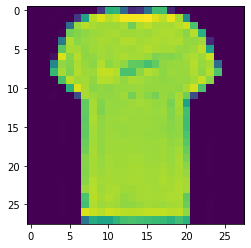

In [6]:
plt.imshow(training[10,1:].reshape(28,28))

- 무작위 값을 설정해서 테스트해보기

5.0

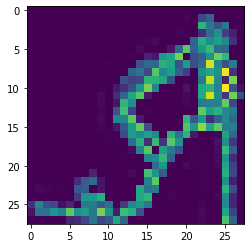

In [7]:
import random
i = random.randint(1,10000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

- 데이터를 행렬 형태로 도식화

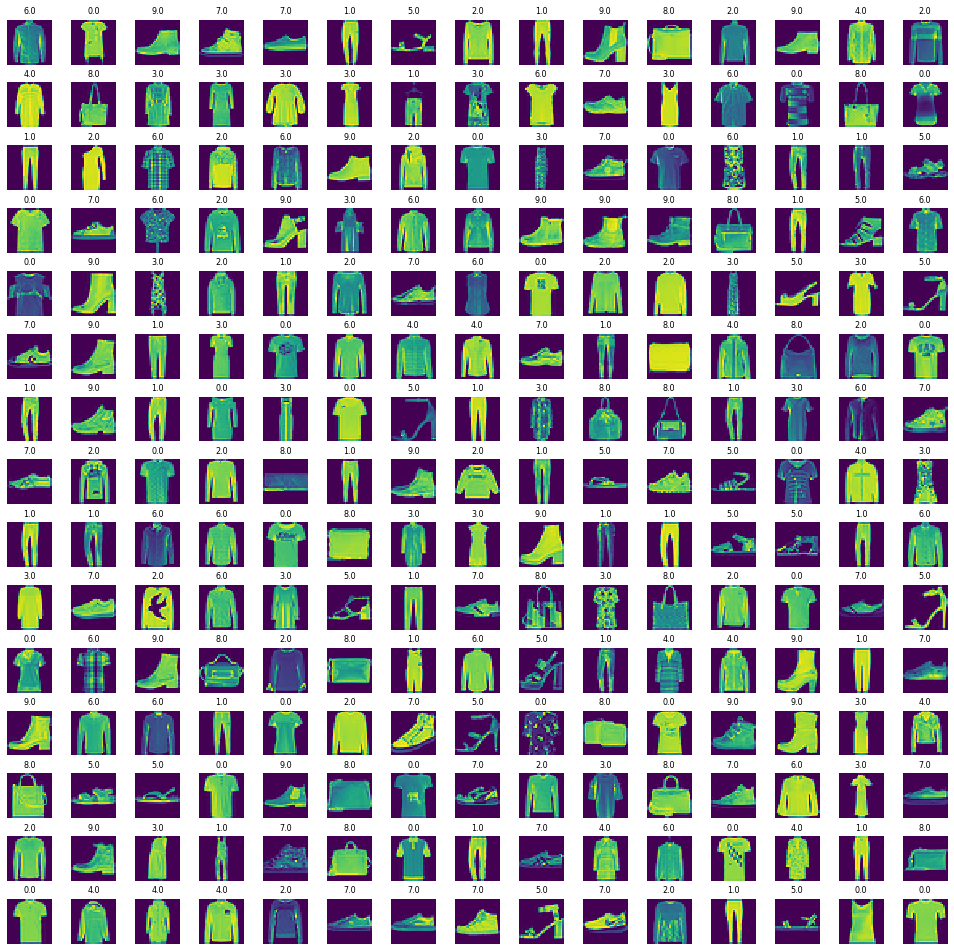

In [8]:
# 간단한 형태로 행렬(격자) 만들기
W_grid = 15
L_grid = 15

# 격자 차원으로 하위 그래프 생성
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

# 배열과 축을 15x15로 평탄화
axes = axes.ravel()

# 학습 데이터 길이 정의
n_training = len(training)

# 도식화하고자하는 전체 이미지 출력
# 무작위 변수를 만들고 변수의 인덱스와 변수에 해당하는 이미지 출력
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

# 이미지 사이의 높이인 hspace 지정
plt.subplots_adjust(hspace=0.4)

## 4. 모델 학습

- 이미지를 스캔하여 이미지의 특징을 추출  

In [9]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [10]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, 
                                                            test_size = 0.2, 
                                                            random_state = 12345)

In [15]:
X_train = X_train.reshape(X_train.shape[0], *(28,28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28,28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28, 1))

In [19]:
print(X_test.shape)
print(X_train.shape)
print(X_validate.shape)

(10000, 28, 28, 1)
(48000, 28, 28, 1)
(12000, 28, 28, 1)


In [20]:
import keras

In [21]:
# 완전 연결 네트워크 구축
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#### 모델 구축
1. 모델을 순차적인 형태로 구축

In [22]:
cnn_model = Sequential()

In [23]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

In [24]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [25]:
cnn_model.add(Flatten())

cnn_model.add(Dense(output_dim = 32, activation = 'relu')) -> 오류  
cnn_model.add(Dense(32, activation = 'relu'))로 설정

In [31]:
cnn_model.add(Dense(32, activation = 'relu'))

In [32]:
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [33]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [34]:
epochs = 50

nb_epochs = epochs -> 오류  
epochs = epochs로 변경

In [36]:
cnn_model.fit(X_train,
             y_train,
             batch_size = 512,
             epochs = epochs,
             verbose = 1,
             validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 2s 21ms/step - loss: 1.6242 - accuracy: 0.4369 - val_loss: 0.8392 - val_accuracy: 0.7006 
Epoch 2/50
94/94 [==============================] - 2s 18ms/step - loss: 0.7303 - accuracy: 0.7356 - val_loss: 0.6624 - val_accuracy: 0.7562
Epoch 3/50
94/94 [==============================] - 2s 18ms/step - loss: 0.6257 - accuracy: 0.7710 - val_loss: 0.6112 - val_accuracy: 0.7729
Epoch 4/50
94/94 [==============================] - 2s 18ms/step - loss: 0.5701 - accuracy: 0.7931 - val_loss: 0.5501 - val_accuracy: 0.8031
Epoch 5/50
94/94 [==============================] - 2s 18ms/step - loss: 0.5299 - accuracy: 0.8064 - val_loss: 0.5166 - val_accuracy: 0.8129
Epoch 6/50
94/94 [==============================] - 2s 18ms/step - loss: 0.5031 - accuracy: 0.8179 - val_loss: 0.4927 - val_accuracy: 0.8215
Epoch 7/50
94/94 [==============================] - 2s 18ms/step - loss: 0.4832 - accuracy: 0.8253 - val_loss: 0.4737 - val_accuracy: 0.8298
Epoch 8/50
9

=> 50회 epoch를 수행한 후 정확도가 87%에 도달했다 꽤 높다 

## 5. 모델 평가

In [38]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3646 - accuracy: 0.8619
Test Accuracy : 0.862


예측 클래스 사용

In [41]:
predicted_classes = cnn_model.predict_classes(X_test)

In [43]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

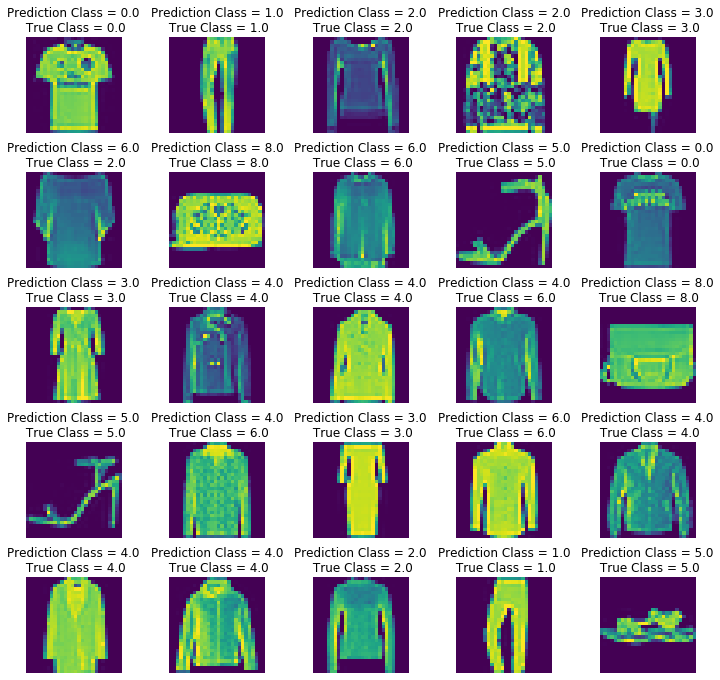

In [45]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class = {:.1f}\n True Class = {:0.1f}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)

- 혼동 행렬 확인하기

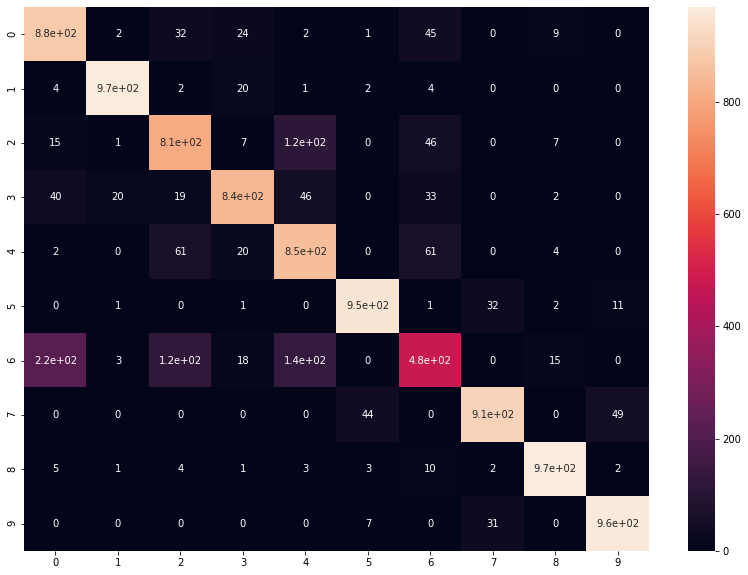

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

=> 정확하게 분류된 대각선들과 잘못 분류된 나머지 것들(개수)

In [47]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.75      0.89      0.81      1000
     Class 1       0.97      0.97      0.97      1000
     Class 2       0.77      0.81      0.79      1000
     Class 3       0.90      0.84      0.87      1000
     Class 4       0.74      0.85      0.79      1000
     Class 5       0.94      0.95      0.95      1000
     Class 6       0.70      0.48      0.57      1000
     Class 7       0.93      0.91      0.92      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
# 0 => 티셔츠
# 1 => 바지
# 2 => 스웨터
# 3 => 원피스
# 4 => 코트
# 5 => 샌들
# 6 => 셔츠
# 7 => 운동화
# 8 => 가방
# 9 => 앵클 부츠

## 6. 모델 개선
1. 32x32 커널(특징 감지기)이 아닌 64 또는 128로 늘려보자
2. 드롭 아웃